In [13]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1 - VarianceThreshold    
Elimine les variables donc la variance est inferieur à un  certain seuil


Pour inferer , un estimateur à besoin des informations qui varient en accord avec la Target

### Methods

get_support() : 
        retourne un booleen indiquant les variables sélectionnées

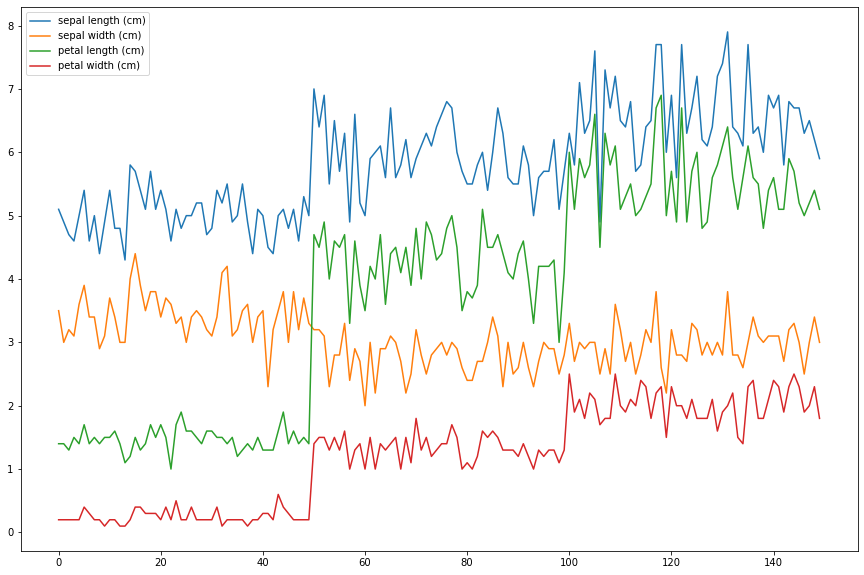

In [6]:
iris = load_iris()
X = iris.data
y=iris.target

plt.figure(figsize=(15 , 10))
plt.plot(X)
plt.legend(iris.feature_names)

In [9]:
X.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [12]:
selector = VarianceThreshold(threshold = 0.2)
selector.fit_transform(X)
selector.get_support()  #indique les variables qui sont selectionnées

array([ True, False,  True,  True])

In [15]:
np.array(iris.feature_names)[selector.get_support()] #pour recuper le nom des variablees

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

# 2- SelectKBest 
##### efficace

il est bassé sur les Tests de dépendances

Il selectionne les K variables X dont le score du test de dépendance avec Y est le plus élévé.

### test de dépendance :
#### feature_selection.chi2(X,y) pour les dépendances entre variables catégorielles
####                               feature_selection.f_classif(X,y)
####                                feature_selection.f_regression(X,y[ ,center])
####                                feature_selection.mutual_info_classif(X,y)
####                                feature_selection.mutual_info_regression(X,y)


### Classification  : Chi 2 , ANOVA
### Régression : Pearson Correlation



## SelectKBest(test_dependance , K)
### Attributs : 
. Scores_ : score du test de dépendance
. pvalues_ : valeur-p du test

## Méthodes habituelles :
. get_support()

In [16]:
from sklearn.feature_selection import SelectKBest ,chi2

In [19]:
chi2(X,y)

#retourne 2 tab
# le premier est le tab du score de chi2 ,  plus il est éleévé , plus il y a forte dépendance 
# entre une variable de X et y

# le 2eme tab est le table de proba 

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [27]:
selector = SelectKBest(k=2)
selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True,  True])

# 3- SelectFromModel

Pré-entrainer un estimateur et examiner ses coeffients pour voir quelles sont les variables importantes(on les sélectionne)

### Notes : 
        compatible avec les estimateurs qui développent une fonction paramétrée(attribut ## .coef_ ou .feature_importance_ ) 
        ==> K-Nearest Neighbour imcompatible

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [42]:
selector = SelectFromModel(SGDClassifier(random_state = 0) , threshold = 'mean') 
#on a tjr besoin d'un seuil pour selectionner les variables 

selector.fit_transform(X,y)
selector.get_support()

#il est possible de voir les parametres trouvés pour le model
# il s' agit d'un metatransformer . C'est à dire un Transforer qui contient un estimateur

coef = selector.estimator_.coef_
coef

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [45]:
#explication du foctionnement ici. sklearn va calculer la moyenne de chaque colonne , 

In [44]:
coef.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [ ]:
# ensuite faire la moyenne de ces valeurs

In [46]:
coef.mean(axis = 0).mean()

-0.9721175565229512

In [47]:
#enfin on fait un seuillage avec la moyenne de chaque colonne

# RFE : Recursive Feature Elimination
# RFECV : Recursive Feature Elimination Cross Validation

RFE et RFECV éliminent les variables les moins importantes de facon récursive.

Un estimateur est entrainé plusieurs fois ,
après chaque entrainement , des features sont éliminées sur la base des coefficients les plus faibles  de l'estimateur

In [48]:
from sklearn.feature_selection import RFE , RFECV

In [51]:
selector = RFECV(SGDClassifier(random_state = 0) , 
                 step = 1,
                min_features_to_select = 2 , 
                cv = 5)

#step : A chaque procedure recursive , step indique le nombre de parametres qui doit etre supprimer
#min_features_to_select : indique le nombre minimun de feature à conserver
#Cv : nombre de K cross validation

selector.fit(X,y)
selector.ranking_ #indique le classement final des variables

array([2, 1, 1, 1])

In [53]:
selector.grid_scores_ #indique le score à chque iteration de l'algo

array([0.8       , 0.84666667, 0.77333333])

# FIN